In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('../data/Portfolio_by_delinquency.xls', sheet_name="FedManagedPortbyDelinquencyStat")

In [13]:
delin_df = df.drop(df.index[-21:])
delin_df = delin_df.iloc[5:]
delin_df = delin_df.ffill()

In [14]:
delin_borrowers_df = delin_df.drop(delin_df.columns[[1, 2, 4, 6, 8, 10, 12]], axis=1)
delin_borrowers_df.columns = ['Year', 'Current Repayment', '31-90 days delinquent', '91-180 days delinquent', '181-270 days delinquent', '271-360 days delinquent', 'Default']

In [15]:
delin_borrowers_df = delin_borrowers_df.groupby(['Year']).mean()
delin_borrowers_df.astype('float').round(1)
delin_borrowers_df_plot = delin_borrowers_df.copy()
delin_borrowers_df.reset_index(inplace=True)

In [16]:
delin_melted_borrow_df = pd.melt(delin_borrowers_df, id_vars=["Year"], value_vars=delin_borrowers_df.columns[1:], var_name="Status", value_name="Value")

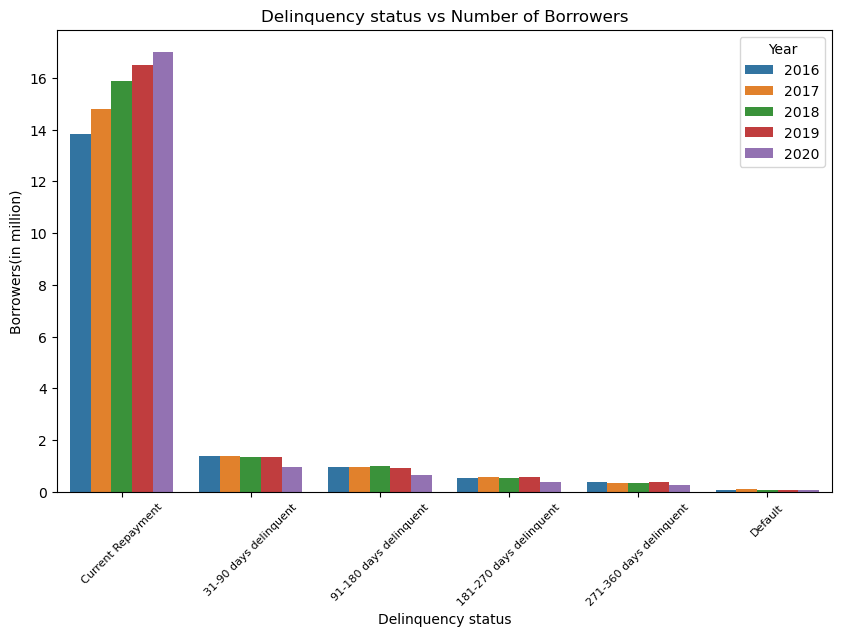

In [17]:
plt.figure(figsize=(10, 6))

# Create line plot
sns.barplot(delin_melted_borrow_df, x="Status", y="Value", hue="Year")  # Transpose the DataFrame for proper x-axis labeling

# Add title and axis labels
plt.title("Delinquency status vs Number of Borrowers")
plt.xlabel("Delinquency status")
plt.ylabel("Borrowers(in million)")

# Rotate x-axis labels (optional)
plt.xticks(rotation=45, fontsize=8)

# Display the plot
plt.show()